<a href="https://colab.research.google.com/github/ProfAI/machine-learning-fondamenti/blob/main/4%20-%20Overfitting%20e%20Tecniche%20di%20Regolarizzazione/overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Riconoscere l'overfitting


In [59]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
RANDOM_SEED = 0

In [137]:
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=100, n_features=100, n_informative=10, n_targets=1, bias=0.0, tail_strength=0.5, noise=50.0, random_state=RANDOM_SEED)
print(X.shape, y.shape)

(100, 100) (100,)


### Hold-out

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_SEED)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(75, 100) (75,)
(25, 100) (25,)


In [139]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [140]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [141]:
def evaluate_model(model, dataset):

  X, y = dataset

  y_pred = model.predict(X)

  print(f"MSE: {mean_squared_error(y, y_pred):.3f}")
  print(f"R2: {r2_score(y, y_pred):.3f}")

In [142]:
evaluate_model(lr, (X_train, y_train))

MSE: 0.000
R2: 1.000


In [143]:
evaluate_model(lr, (X_test, y_test))

MSE: 17991.613
R2: -0.147


### Cross-validation

In [144]:
from sklearn.model_selection import  cross_validate, cross_val_score, KFold

In [145]:
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=5, scoring="r2")
scores

array([ 0.29342089,  0.31176323,  0.102964  ,  0.05863175, -0.26305479])

In [146]:
scores.mean()

0.10074501653588133

In [147]:
lr = LinearRegression()
cv_results = cross_validate(lr, X, y, cv=5, return_train_score=True)
cv_results

{'fit_time': array([0.00525594, 0.00396061, 0.00381327, 0.00360918, 0.00356269]),
 'score_time': array([0.00100112, 0.00100064, 0.00056767, 0.0005796 , 0.00057888]),
 'test_score': array([ 0.29342089,  0.31176323,  0.102964  ,  0.05863175, -0.26305479]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [148]:
cv_results["train_score"].mean()

1.0

In [149]:
cv_results["test_score"].mean()

0.10074501653588133

In [150]:
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
kf.get_n_splits(X)

5

In [151]:
train_score = []
test_score = []

for train_index, test_index in kf.split(X):
  
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  ss = StandardScaler()
  X_train = ss.fit_transform(X_train)
  X_test = ss.transform(X_test)

  lr = LinearRegression()
  lr.fit(X_train, y_train)

  r2_train = r2_score(y_train, lr.predict(X_train))
  train_score.append(r2_train)

  r2_test = r2_score(y_test, lr.predict(X_test))
  test_score.append(r2_test)

scores = {
      "train_score":np.array(train_score),
      "test_score":np.array(test_score)
    }

In [152]:
scores

{'test_score': array([ 0.2099227 , -0.23688425,  0.38714347,  0.30820004,  0.45870191]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [153]:
scores["train_score"].mean()

1.0

In [154]:
scores["test_score"].mean()

0.2254167738129537

### LOOCV

In [155]:
from sklearn.model_selection import LeaveOneOut

In [156]:
loo = LeaveOneOut()
loo.get_n_splits(X)

100

In [157]:
train_score = []
test_score = []

for train_index, test_index in loo.split(X):
  
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  ss = StandardScaler()
  X_train = ss.fit_transform(X_train)
  X_test = ss.transform(X_test)

  lr = LinearRegression()
  lr.fit(X_train, y_train)

  mse_train = mean_squared_error(y_train, lr.predict(X_train))
  train_score.append(mse_train)

  r2_test = mean_squared_error(y_test, lr.predict(X_test))
  test_score.append(r2_test)

scores = {
      "train_score":np.array(train_score),
      "test_score":np.array(test_score)
    }

In [ ]:
scores

In [ ]:
scores["train_score"].mean()

In [ ]:
scores["test_score"].mean()

### Learning Curve

In [158]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns

train_sizes_abs, train_scores, test_scores = learning_curve(LinearRegression(), X, y, random_state=RANDOM_SEED)

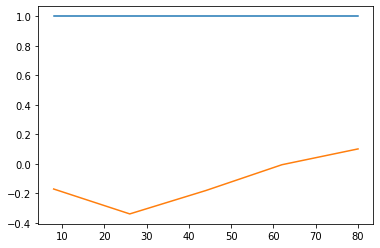

In [159]:
plt.plot(train_sizes_abs, train_scores.mean(axis=1))
plt.plot(train_sizes_abs, test_scores.mean(axis=1))
plt.show()